**Importation des packages**

In [1]:
import sys

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# la ligne ici est ajouté principalement pour SVC dont des mises à jour
# sont annoncées mais jamais mise à jour :)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


#inflect est une librairie qui permet de convertir les nombres en mots
import inflect
import pickle
import contractions
import unicodedata
from collections import Counter
import math
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import json
import numpy
from time import time
import pandas as pd
import numpy as np 
import sklearn
from sklearn.utils import resample
from sklearn_pandas import DataFrameMapper
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package punkt to /home/anas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/anas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/anas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df=pd.read_csv('claim.csv', sep=',')



In [3]:
shapeDF = df.shape
nbLignes, nbColonnes = shapeDF
print("On a", nbLignes, "lignes et", nbColonnes,"colonnes")

print("Cinq premières lignes du dataframe :")
display(df[:5])
# ou :
#display(df.head(5))

print("Information sur le dataframe : ")

print (df.info())

On a 39218 lignes et 23 colonnes
Cinq premières lignes du dataframe :


,Unnamed: 0,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,...,extra_entities_body,extra_entities_claimReview_claimReviewed,extra_entities_keywords,extra_refered_links,extra_tags,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating
0,0,NaN,snopes,NaN,Finnish President Sauli Niinistö posted a vide...,2019-10-07,snopes,https://www.snopes.com/fact-check/president-fi...,NaN,NaN,...,"[{""id"" : 33057"",""""begin"": 46,""end"": 57,""entity...","[{""id"" : 1042690"",""""begin"": 18,""end"": 32,""enti...",[],"https://t.co/Oo5Q56ALAu,https://twitter.com/ia...",NaN,Did the President of Finland Post a Video Resp...,False,NaN,NaN,NaN
1,1,NaN,snopes,NaN,A supporter of U.S. Rep. Alexandria Ocasio-Cor...,2019-10-04,snopes,https://www.snopes.com/fact-check/babies-clima...,NaN,NaN,...,"[{""id"" : 645042"",""""begin"": 33,""end"": 46,""entit...","[{""id"" : 54885332"",""""begin"": 22,""end"": 45,""ent...",[],https://twitter.com/redsteeze/status/117991491...,NaN,Did an AOC Supporter Suggest ‘Eating Babies’ t...,Mixture,NaN,NaN,NaN
2,2,NaN,snopes,NaN,A photograph shows a bride and groom during a ...,2019-10-04,snopes,https://www.snopes.com/fact-check/handmaid-tal...,NaN,NaN,...,"[{""id"" : 50430110"",""""begin"": 91,""end"": 106,""en...","[{""id"" : 50430110"",""""begin"": 46,""end"": 61,""ent...",[],https://twitter.com/God_loves_women/status/117...,NaN,Is This a Photo of a ‘Handmaid’s Tale’-Themed ...,Miscaptioned,NaN,NaN,NaN
3,3,NaN,snopes,NaN,Canada legalized the medicinal use of cocaine.,2019-10-04,snopes,https://www.snopes.com/fact-check/medicinal-co...,NaN,NaN,...,"[{""id"" : 7701"",""""begin"": 96,""end"": 103,""entity...","[{""id"" : 7701"",""""begin"": 38,""end"": 45,""entity""...",[],https://web.archive.org/web/20191004171021/htt...,NaN,Did Canada Legalize the Medicinal Use of Cocaine?,Labeled Satire,NaN,NaN,NaN
4,4,NaN,snopes,NaN,"In September 2019, U.S. President Donald Trump...",2019-10-04,snopes,https://www.snopes.com/fact-check/trump-autism...,NaN,NaN,...,"[{""id"" : 4848272"",""""begin"": 121,""end"": 133,""en...","[{""id"" : 4848272"",""""begin"": 31,""end"": 43,""enti...",[],"http://archive.is/ymlJP,http://archive.is/JgYP...",NaN,Did Donald Trump Sign a $1.8 Billion Autism-Se...,True,NaN,NaN,NaN


Information sur le dataframe : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39218 entries, 0 to 39217
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                39218 non-null  int64  
 1   claimReview_author                        0 non-null      float64
 2   claimReview_author_name                   39218 non-null  object 
 3   claimReview_author_url                    0 non-null      float64
 4   claimReview_claimReviewed                 39216 non-null  object 
 5   claimReview_datePublished                 37913 non-null  object 
 6   claimReview_source                        39218 non-null  object 
 7   claimReview_url                           39218 non-null  object 
 8   creativeWork_author_name                  17481 non-null  object 
 9   creativeWork_author_sameAs                1310 non-null   object 
 10  cr

On peut déjà retirer la colonne Unnamed qui ne nous sera pas utile par la suite, elle indexe juste les claims par rapport à la source

In [4]:
df=df.drop("Unnamed: 0", 1)

Nombre de colonne où il y a au moins une valeur nulle : 15



['claimReview_author',
 'claimReview_author_url',
 'claimReview_claimReviewed',
 'claimReview_datePublished',
 'creativeWork_author_name',
 'creativeWork_author_sameAs',
 'creativeWork_datePublished',
 'extra_body',
 'extra_refered_links',
 'extra_tags',
 'extra_title',
 'rating_alternateName',
 'rating_bestRating',
 'rating_ratingValue',
 'rating_worstRating']

Heatmap des valeurs manquantes :


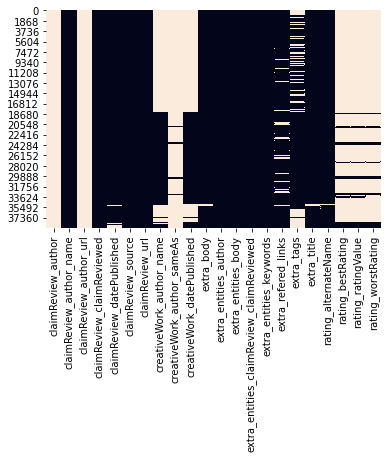

In [5]:
sns.heatmap(df.isnull(), cbar=False)

colonnesNonCompletes = []

for colonne in df.columns.values:
        if(df[colonne].isnull().any()):
            colonnesNonCompletes.append(colonne)

print( "Nombre de colonne où il y a au moins une valeur nulle :", len(colonnesNonCompletes))
print( "")
display(colonnesNonCompletes)

print( "Heatmap des valeurs manquantes :")

<H1> Pré-traitement </H1>

La première phase du projet consiste à faire du feature engineering. C'est à dire qu'il faudra utiliser des méthodes de traitement de données afin de préparer notre dataset à la phase de classification.

**Attribution des valeurs de classe**

On choisit dans un premier temps d'utiliser la méthode de classification suivante : 
{VRAI} vs. {FAUX}

On va alors parcourir la colonne 'rating_alternateName' puis attribuer la valeur '1' pour toutes les assertions 'True' et 0 pour tout le reste. On admet que si ce n'est pas entièrement true, c'est false.

In [6]:
df2 = df.copy()
print(nbLignes)
indexAlternateName = 0
while indexAlternateName < nbLignes:
    phrase = df['rating_alternateName'][indexAlternateName]
    
    #key = df['extra_entities_keywords'][indexAlternateName]
    if  isinstance(phrase, str):
        #tokenization de la phrase
        tokens = word_tokenize(phrase)

        #mise en minuscules 
        tokens = [w.lower() for w in tokens]
        
        if tokens[0] == "true":
            #print("True")
            df2['rating_alternateName'][indexAlternateName] = 1
            
        else:
            df2['rating_alternateName'][indexAlternateName] = 0
            #print(indexAlternateName, " : ", tokens)
    #else:
        #print(indexAlternateName, " : entrée vide")
    #if  isinstance(key, str): #recuperer le sujet de la phrase
        #print(key)
    indexAlternateName+=1
    
indexAlternateName2 = 0
while indexAlternateName2 < nbLignes:
    sujet = df['extra_tags'][indexAlternateName2]
    
    if  isinstance(sujet, str): #recuperer le sujet de la phrase
        x = sujet.split(",")
        #print(indexAlternateName, " : ", x[0])
        df2['extra_tags'][indexAlternateName2] = x[0]
        #print(df2['extra_tags'][indexAlternateName2])
    else : 
        df2 = df2.drop([indexAlternateName2], axis = 0)
    indexAlternateName2+=1
df2.reset_index(drop=True, inplace=True)
    

39218


/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

**Affichage des résultats**

On affiche le nombre d'assertions true/false (attribut rating_alternateName) avec countplot.

Pour nous :
- Une assertion vraie est attribuée à la valeur 1
- Une assertion non vraie est attribuée à la valeur 0

In [7]:
df2.rating_alternateName.sample(5)

15806    0
18502    0
16906    0
14763    1
17087    0
Name: rating_alternateName, dtype: object

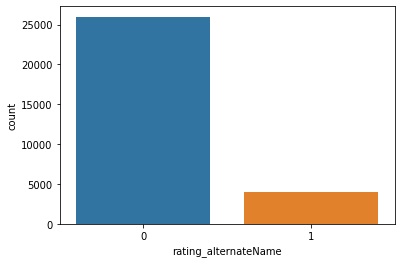

In [8]:
sns.countplot(x='rating_alternateName', data=df2)

**Transformation des phrases d'assertions**



On commence par lancer un processus de transformation sur la colonne 'claimReview_claimReviewed' :

In [9]:
shapeDF = df2.shape
nbLignes, nbColonnes = shapeDF

def replace_contractions(text):
    return contractions.fix(text)

def remove_non_ascii(text):
    new_words = []
    for word in text:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return text

def replace_digits(text):
    p = inflect.engine()
    indiceWord = 0
    tokens2 = ""
    for word in text:
        if word.isdigit():
            text[indiceWord] = p.number_to_words(word)
            phrase2 = sent_tokenize(text[indiceWord])
            tokens2 = word_tokenize(phrase2[0]) #tokenisation de la conversion du digit
            text = text[:indiceWord] + tokens2 + text[indiceWord+1:]
        indiceWord+=1
    return text

def lemmatisation_text(text):
    #Lemmatisation
    wordnet_lemmatizer = WordNetLemmatizer()
    text = [wordnet_lemmatizer.lemmatize(word,pos='v') for word in text]
    return text

def stemmatisation_text(text):
    #Stemmatisation
    porter = PorterStemmer()
    text = [porter.stem(word) for word in text]
    return text

def pos_tag_text(text):
    text = nltk.pos_tag(text)
    return text

def clean_text(text):
    #on supprime les contractions
    text = replace_contractions(text)
    #on tokenize la phrase
    text = word_tokenize(text)
    #on remplace les chiffres par leur équivalent écrit en lettres
    text = replace_digits(text) 
    #mise en minuscules 
    text = [w.lower() for w in text]
    #suppression des ponctuations
    text = [word for word in text if word.isalpha()] 
     #suppression des stop words
    stop_words = set(stopwords.words('english'))
    text = [w for w in text if not w in stop_words] 
    #Stemmatisation
    text = stemmatisation_text(text)
    #On remet le texte sous forme d'une phrase
    text="".join([" "+i for i in text]).strip()
    return text

#on traite chaque ligne de la colonne 'claimReview_claimReviewed'

cleanClaimsLms = []

print("Pré-traitement en cours...")
t0 = time()
indexClaimReviewed=0
while indexClaimReviewed < nbLignes:
    ligne = df['claimReview_claimReviewed'][indexClaimReviewed]
    #print("Progression : ",indexClaimReviewed,"/",nbLignes, end="\r")
    #On vérifie si la ligne est bien une chaîne de caractères 'str' non vide, autrement on la supprime du dataset
    if isinstance(ligne, str) and ligne:
        #On découpe en phrase pour prendre la première, qui correspond à l'assertion
        phrase = sent_tokenize(ligne)[0]
        
        phrase = clean_text(phrase)
        
        cleanClaimsLms.append(phrase)     
           
    #Dans le cas d'une claim vide, on enlève toute la ligne comme elle ne pourra pas nous être utile
    else:       
        #On supprime toute l'entrée
        df2 = df2.drop(df2.index[indexClaimReviewed])
        
    indexClaimReviewed+=1
    
print("Pré-traitement terminée en %0.3fs" % (time() - t0))
#On ré-assigne les index pour re-synchroniser les entrées supprimées   
df2.reset_index(drop=True, inplace=True)


Pré-traitement en cours...
Pré-traitement terminée en 15.672s


In [10]:
#On crée une nouvelle colonne avec les claims nettoyées
df2['claimReview_Cleaned'] = cleanClaimsLms   


In [11]:
display(df2['claimReview_Cleaned'].sample(5))

21818    never direct suprem court case peopl illeg whe...
26767    medicar good better keep peopl healthi medicar...
12661                     credit card charg laundri servic
23239    say texa board nurs backlog complaint nurs man...
18449    monica lewinski offer take one team perform or...
Name: claimReview_Cleaned, dtype: object

On stocke le résultat de la transformation dans une nouvelle colonne du dataframe 'df2' qui va nous servir plus tard pour la classification. (On garde les données originales dans 'df')

**Extractions des URLs**

In [12]:
def get_urls_from_text(text):
    domain2=re.findall('https?:\/\/(?:www\.)?([^\/]+)', text)
    #print("Url : " + url)
    urls = []
    #suppression des doublons
    for j in domain2:
        if j not in urls:
            urls.append(j)
    #url ="".join([" "+i for i in urls]).strip()
    #return url
    if(len(urls) > 1):
        return urls[0]
    else:
        return "NaN"
    

minimized_urls = []
idx = 0
t0 = time()
nbLignes, nbColonnes = df2.shape

print("Traitement des urls en cours...")

while idx < nbLignes:
    #print("Ligne ",idx)
    url = df2['extra_refered_links'][idx]
    if isinstance(url, str) and url:
        url = sent_tokenize(url)[0]
        url = get_urls_from_text(url)
        minimized_urls.append(url)
    else:
        minimized_urls.append("")
        
    idx+=1
print("Traitement des urls terminé en %0.3fs" % (time() - t0))

Traitement des urls en cours...
Traitement des urls terminé en 202.872s


In [13]:
#On crée une nouvelle colonne avec les urls nettoyées
df2['minimized_urls'] = minimized_urls   
display(df2['minimized_urls'].sample(5))

21632                     
4907     stemcells.nih.gov
19286          nces.ed.gov
6392       nydailynews.com
9648                   NaN
Name: minimized_urls, dtype: object

**Extraction des entités**

Après avoir observé quelques lignes de la colonne 'extra_entities_claimReview_claimReviewed', on a constaté que certaines entrées JSON étaient mal formées. Cette fonction permet de les corriger dans la plupart des cas :

In [14]:
#Traitement JSON colone extra_entities_claimReview_claimReviewed 
def fix_json_string(line_string):
    result = line_string.replace('",""begin"', ',"begin"')
    return result

df2['fixed_extra_claimReviewed'] = df['extra_entities_claimReview_claimReviewed'].apply(lambda x: fix_json_string(x))

On peut maintenant récupérer les entités en parsant les JSON qu'on vient de réparer :

In [15]:
#Récupération entity
def get_entity(fixed_line):
    try : 
        meta_data = json.loads(fixed_line)
        result = [item['entity'] for item in meta_data]
        return result
    except ValueError:  
        return 'NaN'
    
#Récupération category
def get_category(fixed_line):
    meta_data = json.loads(fixed_line)
    result = [item['categories'] for item in meta_data]
    return result

#Récupération score
def get_score(fixed_line):
    try:
        meta_data = json.loads(fixed_line)
        result = [item['score'] for item in meta_data]
        if(len(result) > 1):
            return result[0]
        else:
            return float('NaN')
    except ValueError:
        return float('NaN')

def stringify(liste):
    if liste == "NaN" or not liste:
        return "NaN"
    else:
        #text="".join([""+i for i in liste]).strip()
        #return text
        return liste[0]


#Création colonne des entités dans notre dataframe
df2['fixed_entities'] = df2['fixed_extra_claimReviewed'].apply(lambda x: get_entity(x))
df2['fixed_score_entities'] = df2['fixed_extra_claimReviewed'].apply(lambda x: get_score(x))
df2['fixed_entities'] = df2['fixed_entities'].apply(lambda x: stringify(x))


Affichage des entités :

In [16]:
df2.iloc[0:50]

,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,creativeWork_datePublished,...,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating,claimReview_Cleaned,minimized_urls,fixed_extra_claimReviewed,fixed_entities,fixed_score_entities
0,NaN,snopes,NaN,"U.S. Rep. Adam Schiff is """"linked"""" to a Ukrai...",2019-10-03,snopes,https://www.snopes.com/fact-check/adam-schiff-...,NaN,NaN,NaN,...,Is Adam Schiff ‘Linked’ to a ‘Prominent Ukrain...,0,NaN,NaN,NaN,finnish presid sauli niinistö post video white...,mediabiasfactcheck.com,"[{""id"" : 1042690,""begin"": 18,""end"": 32,""entity...",Sauli Niinistö,0.64
1,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,support alexandria suggest eat babi combat cli...,latinospost.com,"[{""id"" : 54885332,""begin"": 22,""end"": 45,""entit...",Alexandria Ocasio-Cortez,0.56
2,NaN,snopes,NaN,"The intelligence community """"secretly eliminat...",2019-10-01,snopes,https://www.snopes.com/fact-check/whistleblowe...,NaN,NaN,NaN,...,Did US Intelligence Eliminate a Requirement Th...,0,NaN,NaN,NaN,photograph show bride groom handmaid tale wed,npr.org,"[{""id"" : 50430110,""begin"": 46,""end"": 61,""entit...",The Handmaid's Tale (TV series),NaN
3,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,canada legal medicin use cocain,latinospost.com,"[{""id"" : 7701,""begin"": 38,""end"": 45,""entity"": ...",Cocaine,NaN
4,NaN,snopes,NaN,Betsy Ross made the first American flag (or on...,2019-09-27,snopes,https://www.snopes.com/fact-check/betsy-ross-q...,NaN,NaN,NaN,...,Was Betsy Ross a Quaker Who Was Opposed to Sla...,0,NaN,NaN,NaN,septemb two thousand nineteen presid donald tr...,snopes.com,"[{""id"" : 4848272,""begin"": 31,""end"": 43,""entity...",Donald Trump,0.64
5,NaN,snopes,NaN,A Fox News guest disparaged teenage climate ac...,2019-09-25,snopes,https://www.snopes.com/fact-check/fox-news-gue...,NaN,NaN,NaN,...,Did a Fox News Guest Disparage Teen Climate Ac...,1,NaN,NaN,NaN,monica lewinski offer take one team perform or...,mediabiasfactcheck.com,"[{""id"" : 19948,""begin"": 0,""end"": 15,""entity"": ...",Monica Lewinsky,0.63
6,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,nasa noaa fake climat data gistemp global temp...,latinospost.com,"[{""id"" : 18426568,""begin"": 0,""end"": 4,""entity""...",NASA,0.61
7,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,septemb two thousand nineteen hous democrat vo...,latinospost.com,"[{""id"" : 1129641,""begin"": 75,""end"": 99,""entity...",Electronic health record,NaN
8,NaN,snopes,NaN,A leprosy outbreak was looming in Los Angeles ...,2019-09-19,snopes,https://www.snopes.com/fact-check/leprosy/,NaN,NaN,NaN,...,Is a Leprosy Outbreak Looming in Los Angeles?,0,NaN,NaN,NaN,adam schiff link ukrainian arm dealer,nbcnews.com,"[{""id"" : 408932,""begin"": 7,""end"": 18,""entity"":...",Adam Schiff,NaN
9,NaN,snopes,NaN,An image shows a village of shacks in Los Ange...,2019-09-18,snopes,https://www.snopes.com/fact-check/conditions-i...,NaN,NaN,NaN,...,Does a Picture Show a Shanty Town in Los Angeles?,0,NaN,NaN,NaN,abc cb nbc msnbc npr pb refus cover abortionis...,facebook.com,"[{""id"" : 62027,""begin"": 0,""end"": 3,""entity"": ""...",American Broadcasting Company,0.44


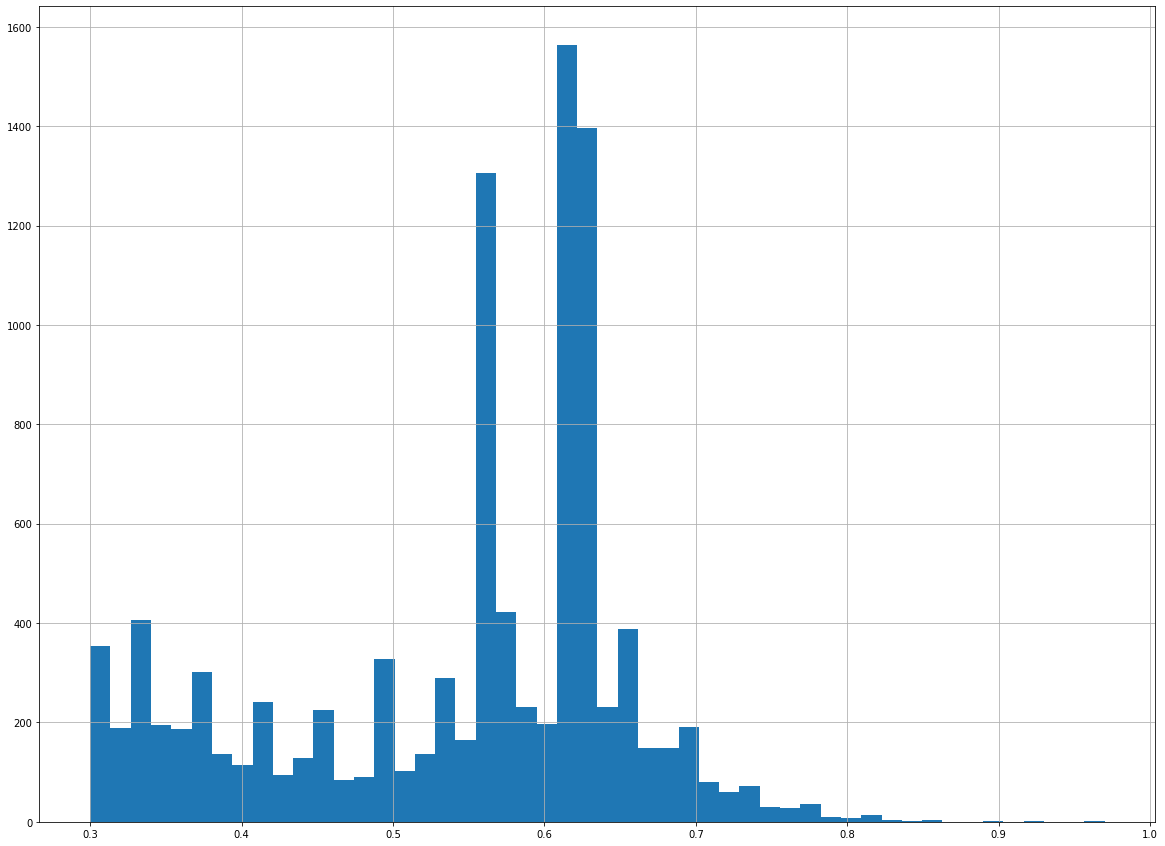

In [17]:
df2['fixed_score_entities'].hist(bins=50, figsize=(20, 15))
plt.show()

In [18]:
# valeur moyenne
mean_score = df2['fixed_score_entities'].mean()
df2['fixed_score_entities'] = df2['fixed_score_entities'].fillna(mean_score)

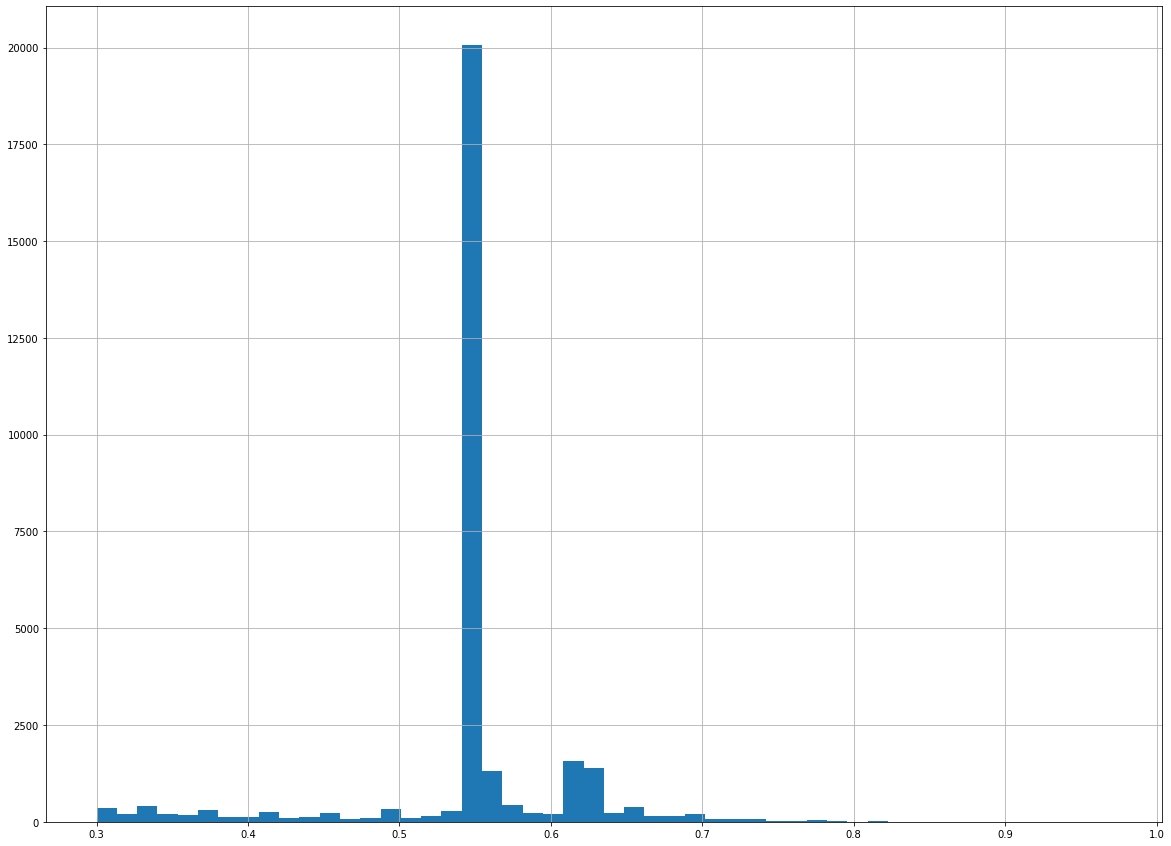

In [19]:
df2['fixed_score_entities'].hist(bins=50, figsize=(20, 15))
plt.show()

In [20]:
df2['claimReview_datePublished'] = df2['claimReview_datePublished'].fillna('NaN')

In [21]:
df2.iloc[0:50]

,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,creativeWork_datePublished,...,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating,claimReview_Cleaned,minimized_urls,fixed_extra_claimReviewed,fixed_entities,fixed_score_entities
0,NaN,snopes,NaN,"U.S. Rep. Adam Schiff is """"linked"""" to a Ukrai...",2019-10-03,snopes,https://www.snopes.com/fact-check/adam-schiff-...,NaN,NaN,NaN,...,Is Adam Schiff ‘Linked’ to a ‘Prominent Ukrain...,0,NaN,NaN,NaN,finnish presid sauli niinistö post video white...,mediabiasfactcheck.com,"[{""id"" : 1042690,""begin"": 18,""end"": 32,""entity...",Sauli Niinistö,0.640000
1,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,support alexandria suggest eat babi combat cli...,latinospost.com,"[{""id"" : 54885332,""begin"": 22,""end"": 45,""entit...",Alexandria Ocasio-Cortez,0.560000
2,NaN,snopes,NaN,"The intelligence community """"secretly eliminat...",2019-10-01,snopes,https://www.snopes.com/fact-check/whistleblowe...,NaN,NaN,NaN,...,Did US Intelligence Eliminate a Requirement Th...,0,NaN,NaN,NaN,photograph show bride groom handmaid tale wed,npr.org,"[{""id"" : 50430110,""begin"": 46,""end"": 61,""entit...",The Handmaid's Tale (TV series),0.544079
3,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,canada legal medicin use cocain,latinospost.com,"[{""id"" : 7701,""begin"": 38,""end"": 45,""entity"": ...",Cocaine,0.544079
4,NaN,snopes,NaN,Betsy Ross made the first American flag (or on...,2019-09-27,snopes,https://www.snopes.com/fact-check/betsy-ross-q...,NaN,NaN,NaN,...,Was Betsy Ross a Quaker Who Was Opposed to Sla...,0,NaN,NaN,NaN,septemb two thousand nineteen presid donald tr...,snopes.com,"[{""id"" : 4848272,""begin"": 31,""end"": 43,""entity...",Donald Trump,0.640000
5,NaN,snopes,NaN,A Fox News guest disparaged teenage climate ac...,2019-09-25,snopes,https://www.snopes.com/fact-check/fox-news-gue...,NaN,NaN,NaN,...,Did a Fox News Guest Disparage Teen Climate Ac...,1,NaN,NaN,NaN,monica lewinski offer take one team perform or...,mediabiasfactcheck.com,"[{""id"" : 19948,""begin"": 0,""end"": 15,""entity"": ...",Monica Lewinsky,0.630000
6,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,nasa noaa fake climat data gistemp global temp...,latinospost.com,"[{""id"" : 18426568,""begin"": 0,""end"": 4,""entity""...",NASA,0.610000
7,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,septemb two thousand nineteen hous democrat vo...,latinospost.com,"[{""id"" : 1129641,""begin"": 75,""end"": 99,""entity...",Electronic health record,0.544079
8,NaN,snopes,NaN,A leprosy outbreak was looming in Los Angeles ...,2019-09-19,snopes,https://www.snopes.com/fact-check/leprosy/,NaN,NaN,NaN,...,Is a Leprosy Outbreak Looming in Los Angeles?,0,NaN,NaN,NaN,adam schiff link ukrainian arm dealer,nbcnews.com,"[{""id"" : 408932,""begin"": 7,""end"": 18,""entity"":...",Adam Schiff,0.544079
9,NaN,snopes,NaN,An image shows a village of shacks in Los Ange...,2019-09-18,snopes,https://www.snopes.com/fact-check/conditions-i...,NaN,NaN,NaN,...,Does a Picture Show a Shanty Town in Los Angeles?,0,NaN,NaN,NaN,abc cb nbc msnbc npr pb refus cover abortionis...,facebook.com,"[{""id"" : 62027,""begin"": 0,""end"": 3,""entity"": ""...",American Broadcasting Company,0.440000


In [22]:
def fix_json_string(line_string):
    result = line_string.replace('",""begin"', ',"begin"')
    return result

df2['fixed_extra_subject'] = df['extra_entities_keywords'].apply(lambda x: fix_json_string(x))

In [23]:

#Récupération category
def get_category(fixed_line):
    try : 
        meta_data = json.loads(fixed_line)
        result = [item['categories'] for item in meta_data]
        return result
    except ValueError: 
        return 'NaN'

def get_catSubject(fixed_subject):
    if not fixed_subject :
        return 'NaN'
    else :
        x = fixed_subject[0]
        if not x :
            return 'NaN'
        else: 
            return fixed_subject[0][0]

df2['fixed_extra_subject2'] = df2['fixed_extra_subject'].apply(lambda x: get_category(x))
df2['fixed_subject'] =df2['fixed_extra_subject2'].apply(lambda x: get_catSubject(x))


In [24]:
df2['fixed_subject'].iloc[10000:10030]

10000                HBO network shows
10001                              NaN
10002                              NaN
10003                              NaN
10004                              NaN
10005                              NaN
10006                              NaN
10007                              NaN
10008                HBO network shows
10009                              NaN
10010                              NaN
10011    Confederate States of America
10012                              NaN
10013                              NaN
10014                              NaN
10015                              NaN
10016                              NaN
10017                  Edible Apiaceae
10018                              NaN
10019                              NaN
10020    Confederate States of America
10021                              NaN
10022                       Sweeteners
10023                            Islam
10024                              NaN
10025                    

In [25]:
categories_sorting = Counter(df2.fixed_subject)
categories_sorting.most_common()

[('NaN', 22713),
 ('Living people', 641),
 ('Barack Obama', 329),
 ('HBO network shows', 217),
 ('Australian films', 202),
 ('Public finance', 176),
 ('Economic systems', 174),
 ('Abortion', 173),
 ('Federal assistance in the United States', 146),
 ('Health care', 137),
 ('Climate change', 118),
 ('Facebook', 113),
 ('Unprintworthy redirects', 108),
 ('Economic policy', 97),
 ('United States federal budgets', 88),
 ('Financial regulation', 84),
 ('Cannabis', 80),
 ('United States presidential election, 2016', 71),
 ('1941 births', 65),
 ('ABC News', 65),
 ('1946 births', 56),
 ('Afghanistan', 47),
 ('Employment', 47),
 ('Articles with inconsistent citation formats', 45),
 ('Israel', 45),
 ('Islam', 41),
 ('Iraq', 41),
 ('Polling', 41),
 ('Political funding', 39),
 ('Audi vehicles', 37),
 ('Election campaigning', 37),
 ('1970 births', 36),
 ('Bill Clinton', 34),
 ('1965 births', 34),
 ('Public health', 34),
 ('Social Security (United States)', 31),
 ('The Walt Disney Company', 30),
 ('1

**Nettoyage de colonnes et stockage du pré-traitement**

Dans notre dataframe, on va supprimer toutes les colonnes non utiles à la classification ou déjà traitées. On rajoute aussi le résultat des colonnes qu'on a traitées.


In [26]:
#On drop les colonnes inutiles à la classification dans df2 et celles qu'on déjà traitées avant
#df2=df2.drop('fixed_score_entities',1)
df2=df2.drop('extra_body',1)

df2=df2.drop('fixed_extra_subject',1)
df2=df2.drop('fixed_extra_subject2',1)
df2=df2.drop('extra_entities_author',1)
df2=df2.drop('extra_entities_keywords',1)
df2=df2.drop('fixed_extra_claimReviewed',1)
df2=df2.drop('claimReview_author',1)
df2=df2.drop('extra_entities_claimReview_claimReviewed', 1)
df2=df2.drop('claimReview_author_url',1)
#df2=df2.drop('claimReview_datePublished',1)
df2=df2.drop('claimReview_claimReviewed',1)
df2=df2.drop('claimReview_url',1)
df2=df2.drop('creativeWork_author_name',1)
df2=df2.drop('creativeWork_author_sameAs',1)
df2=df2.drop('creativeWork_datePublished',1)
df2=df2.drop('extra_entities_body',1)
df2=df2.drop('extra_refered_links',1)
df2=df2.drop('extra_title',1)
df2=df2.drop('rating_bestRating',1)
df2=df2.drop('rating_ratingValue',1)
df2=df2.drop('rating_worstRating',1)


In [27]:
print("Affichage de DF2 après nettoyage : ")

shapeDF2 = df2.shape
nbLignesNew, nbColonnesNew = shapeDF2
print("On a maintenant", nbLignesNew, "lignes et", nbColonnesNew,"colonnes")
print("Contre ", shapeDF," dans le dataset original")

Affichage de DF2 après nettoyage : 
On a maintenant 30239 lignes et 10 colonnes
Contre  (30239, 22)  dans le dataset original


In [28]:
display(df2.sample(5))

,claimReview_author_name,claimReview_datePublished,claimReview_source,extra_tags,rating_alternateName,claimReview_Cleaned,minimized_urls,fixed_entities,fixed_score_entities,fixed_subject
9334,snopes,2012-10-01,snopes,ASP Article,0,florida powerbal winner militari widow name ca...,NaN,Powerball,0.544079,NaN
16344,politifact,2014-07-23,politifact,Economy,0,radio comment paul harvey compos review upcom ...,whitehouse.gov,Paul Harvey,0.544079,NaN
13763,politifact,2019-10-14,politifact,Education,1,ugg give away free pair boot facebook user,davidtoscano.com,Ugg boots,0.310000,NaN
8006,snopes,2014-07-02,snopes,ASP Article,1,donald trump children face charg evad two hund...,,Donald Trump,0.544079,Living people
23865,politifact,2019-10-11,politifact,Crime,0,republican committe noth address oversight far...,cbsnews.com,NaN,0.544079,NaN


**Regroupement des catégories**

In [29]:
g = df2.groupby(['claimReview_author_name','rating_alternateName'])
print (g.count())

                                              claimReview_datePublished  \
claimReview_author_name rating_alternateName                              
africacheck             0                                           575   
factscan                0                                            86   
                        1                                            39   
fullfact                0                                           192   
politifact              0                                         14114   
                        1                                          2335   
snopes                  0                                         11010   
                        1                                          1638   

                                              claimReview_source  extra_tags  \
claimReview_author_name rating_alternateName                                   
africacheck             0                                    575         575   
factscan 

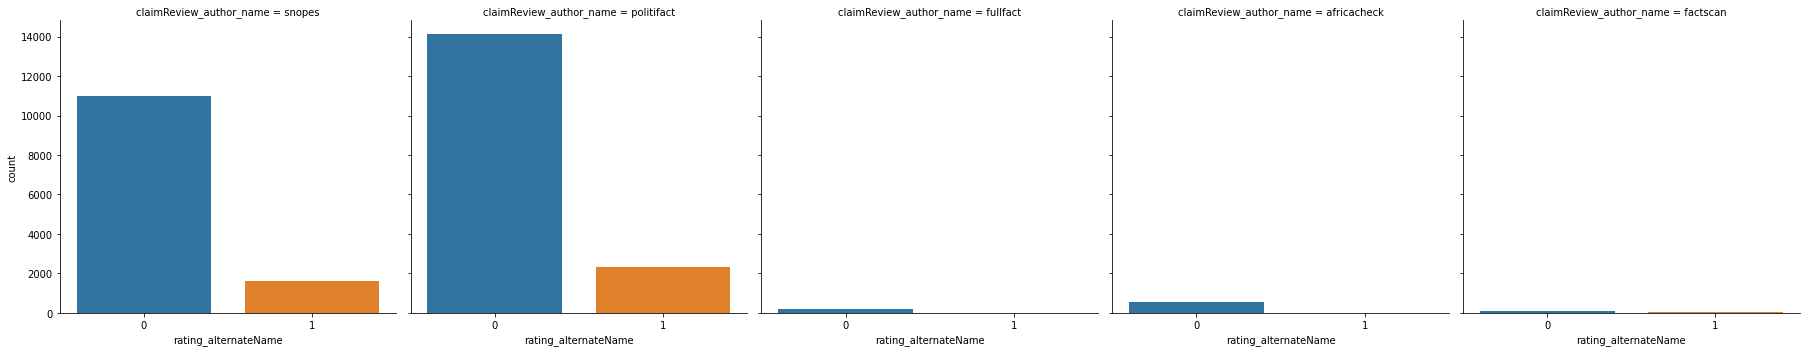

In [30]:
sns.catplot(x='rating_alternateName',col='claimReview_author_name',kind='count',data=df2)

In [31]:
categories_sorting = Counter(df2.extra_tags)
categories_sorting.most_common()

[('ASP Article', 4386),
 ('Economy', 1289),
 ('Health Care', 1170),
 ('supernatural', 1136),
 ('Candidate Biography', 854),
 ('Education', 850),
 ('Elections', 715),
 ('Crime', 625),
 ('Fake news', 575),
 ('Federal Budget', 545),
 ('donald trump', 532),
 ('Immigration', 513),
 ('Taxes', 494),
 ('Foreign Policy', 463),
 ('Abortion', 372),
 ('Energy', 357),
 ('Guns', 317),
 ('Corrections and Updates', 286),
 ('Campaign Finance', 285),
 ('State Budget', 280),
 ('Children', 276),
 ('Jobs', 268),
 ('Congress', 265),
 ('animals', 220),
 ('History', 217),
 ('Home', 210),
 ('Environment', 203),
 ('Deficit', 191),
 ('barack obama', 184),
 ('Climate Change', 174),
 ('Homeland Security', 165),
 ('Corporations', 155),
 ('Civil Rights', 150),
 ('Ethics', 140),
 ('Job Accomplishments', 140),
 ("['Home'", 139),
 ('Criminal Justice', 131),
 ('Debt', 128),
 ('City Government', 122),
 ('Bipartisanship', 120),
 ('Legal Issues', 119),
 ('Drugs', 111),
 ('Agriculture', 110),
 ('City Budget', 102),
 ('Trans

In [32]:
index = 0
while index < nbLignes:
    if len(df['extra_entities_keywords'][index]) > 2 :
        print(df['extra_entities_keywords'][index])
    index+=1

[{"id" : 4848272",""begin": 0,"end": 12,"entity": "Donald Trump","text": "donald trump","score": 0.79,"categories" : ["Living people","1946 births","20th-century American businesspeople","20th-century American writers","21st-century American businesspeople","21st-century American writers","American billionaires","American business writers","American casino industry businesspeople","American chief executives","American construction businesspeople","American cosmetics businesspeople","American education businesspeople","American fashion businesspeople","American game show hosts","American people of German descent","American people of Scottish descent","American Presbyterians","American real estate businesspeople","American reality television producers","American restaurateurs","American socialites","Businesspeople from Florida","Businesspeople from New York City","Businesspeople in the beverage industry","Conspiracy theorists","Fordham University alumni","New York Military Academy alumni

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[{"id" : 6690",""begin": 0,"end": 8,"entity": "Coca-Cola","text": "coca-cola","score": 0.45,"categories" : ["Coca-Cola","1886 introductions","American beverages","American inventions","Article Feedback 5 Additional Articles","Coca-Cola brands","Cola brands","Patent medicines"]},{"id" : 369682",""begin": 23,"end": 42,"entity": "Lost in Translation (film)","text": "lost in translation","score": 0.41,"categories" : ["2003 films","2000s drama films","American independent films","American comedy-drama films","American romantic drama films","Films about language and translation","Films set in hotels","Films set in Tokyo","Films set in Japan","Films shot in Tokyo","Films shot in Japan","Films directed by Sofia Coppola","Films whose writer won the Best Original Screenplay Academy Award","Films featuring a Best Musical or Comedy Actor Golden Globe winning performance","Best Musical or Comedy Picture Golden Globe winners","American Zoetrope films","Focus Features films","English-language films"

[{"id" : 4360909",""begin": 10,"end": 22,"entity": "Government budget","text": "State Budget","score": 0.31,"categories" : ["Public finance","Government budgets","Fiscal policy"]},{"id" : 268515",""begin": 23,"end": 37,"entity": "Public finance","text": "State Finances","score": 0.31,"categories" : ["Macroeconomics","Public finance","Public economics"]}]
[{"id" : 208840",""begin": 0,"end": 20,"entity": "Financial regulation","text": "Financial Regulation","score": 0.47,"categories" : ["Financial regulation","Systemic risk"]}]
[{"id" : 6639133",""begin": 0,"end": 7,"entity": "Economy","text": "Economy","score": 0.30,"categories" : ["Economic systems","Economics","Economies"]}]
[{"id" : 277315",""begin": 0,"end": 5,"entity": "Opinion poll","text": "Polls","score": 0.34,"categories" : ["Polling","Types of polling","Survey methodology","Psychometrics","Public opinion","Sampling (statistics)"]},{"id" : 216170",""begin": 10,"end": 24,"entity": "Public opinion","text": "Public Opinion","score

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
print(df2.loc[(df2["rating_alternateName"] == 0) & (df2["extra_tags"] == "Health Care")])

      claimReview_author_name claimReview_datePublished claimReview_source  \
1363                   snopes                       NaN             snopes   
15012              politifact                2019-10-11         politifact   
15017              politifact                2019-10-10         politifact   
15034              politifact                2019-06-05         politifact   
15046              politifact                2019-05-10         politifact   
...                       ...                       ...                ...   
28982              politifact                2019-10-13         politifact   
29008              politifact                2019-01-25         politifact   
29054              politifact                2015-04-07         politifact   
29060              politifact                2014-09-30         politifact   
29115              politifact                2019-10-15         politifact   

        extra_tags rating_alternateName  \
1363   Health Care  

**Visualisation des catégories**

Chaque assertion est taggée par une catégorie. Nous allons prendre les catégories qui reviennent le plus pour visualiser les valeurs des assertions qui leur sont reliées.

In [34]:
def get_n_most_common(n):
    count = Counter(df2.extra_tags)
    most_common = count.most_common(n)
    return most_common

On supprime la catégorie 'nan' :

In [35]:
#On enlève la première catégorie puisqu'on sait que c'est 'nan'
def get_n_categories_distribution(n):
    most_common = get_n_most_common(n)
    categories_distribution = most_common[1:len(most_common)]
    return categories_distribution

On extrait le nom des catégories :

In [36]:
def get_n_noms_categories(n):
    categories_distribution = get_n_categories_distribution(n)
    categories = [x[0] for x in categories_distribution];
    return categories

In [37]:
def get_dict_data_with_n_categories(n):
    categories = get_n_noms_categories(n)
    dict = {'category' : [],
        'faux/vrai' : []
    }
    
    nbLignes, nbColonnes = df2.shape
    
    idx = 0
    while idx < nbLignes:
        current_categorie = df2['extra_tags'][idx]
        if isinstance(current_categorie, str) and current_categorie:
            #print(idx, " : ", current_categorie)       
            if (current_categorie in categories):
                dict['category'].append(current_categorie)
                dict['faux/vrai'].append(df2['rating_alternateName'][idx])         
        idx+=1
    return dict

On veut pouvoir afficher les 5 catégories les plus retrouvées et afficher la distribution des classes qui leur est associée :

30239


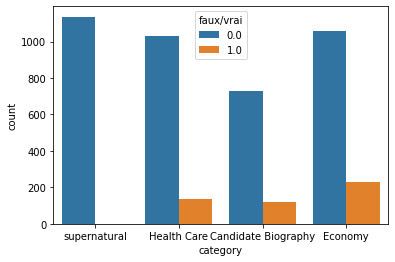

In [38]:
print(len(df2['extra_tags']))
dict = get_dict_data_with_n_categories(5)

categoriesDF = pd.DataFrame.from_dict(dict)

ax = sns.countplot(x="category", hue="faux/vrai", data=categoriesDF)

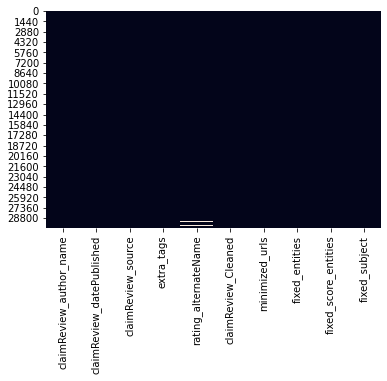

In [39]:
sns.heatmap(df2.isnull(), cbar=False)

<H1> Classification </H1>

La phase de pré-traitement est maintenant terminée. Nous allons pouvoir sauvegarder notre dataset préparé et ainsi passer à la phase de classification.


In [40]:
df_majority = df2[df2.rating_alternateName==0]
df_minority = df2[df2.rating_alternateName==1]

df_majority_downsampled = resample(df_majority, replace = False,n_samples = 4594,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

df_downsampled.rating_alternateName.value_counts()
display(df_downsampled)
print(df_downsampled.shape)
print(df_downsampled[df2.rating_alternateName==1].count())

,claimReview_author_name,claimReview_datePublished,claimReview_source,extra_tags,rating_alternateName,claimReview_Cleaned,minimized_urls,fixed_entities,fixed_score_entities,fixed_subject
10348,snopes,2001-10-05,snopes,naked,0,video captur strang apocalypt sound come sky a...,NaN,NaN,0.544079,NaN
2156,snopes,2017-11-06,snopes,antifa,0,support alexandria suggest eat babi combat cli...,snopes.com,Alexandria Ocasio-Cortez,0.560000,NaN
1224,snopes,2018-05-22,snopes,boy scouts of america,0,motorist fine nine hundr licens suspend three ...,snopes.com,NaN,0.544079,NaN
6794,snopes,2015-04-16,snopes,marilyn monroe,0,donald trump elect presid pope franci said los...,donotlink.com,Donald Trump,0.690000,NaN
27338,politifact,2018-11-06,politifact,Elections,0,scottwalk told firefight need worri act ten sa...,snopes.com,NaN,0.544079,NaN
...,...,...,...,...,...,...,...,...,...,...
30220,factscan,2015-03-15,factscan,CPC,1,got six billion opioid get rid scourg take cou...,openparliament.ca,Opioid,0.544079,NaN
30222,factscan,2015-03-11,factscan,Jobs,1,horribl law requir children separ parent cross...,cbc.ca,NaN,0.544079,NaN
30230,factscan,2015-02-20,factscan,genocide,1,irand ultim would guarante iran nuclear bomb c...,openparliament.ca,Iran,0.544079,Iran
30231,factscan,2015-02-19,factscan,Climate Change,1,perpetr school shoot drug mani case mani young...,cbc.ca,Methylphenidate,0.544079,NaN


(8606, 10)
claimReview_author_name      4012
claimReview_datePublished    4012
claimReview_source           4012
extra_tags                   4012
rating_alternateName         4012
claimReview_Cleaned          4012
minimized_urls               4012
fixed_entities               4012
fixed_score_entities         4012
fixed_subject                4012
dtype: int64


/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [41]:
#On met notre colonne de classe à la fin pour améliorer la lisibilité

df_downsampled = df_downsampled[[c for c in df_downsampled if c not in ['rating_alternateName']] + ['rating_alternateName']]

**Définition de y**

In [42]:
array = df_downsampled.values
y = array[:,9]
y=y.astype('int')

print("y = ")
display(y[:5])


y = 


array([0, 0, 0, 0, 0])

**Définition des features et de leur traitement respectif**

10348      (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
2156       (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
1224       (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
6794       (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
27338      (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
                               ...                        
30220      (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
30222      (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
30230      (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
30231      (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
30234      (0, 8978)\t0.3221307599796534\n  (0, 423)\t0...
Name: claimReview_Cleaned, Length: 8606, dtype: object

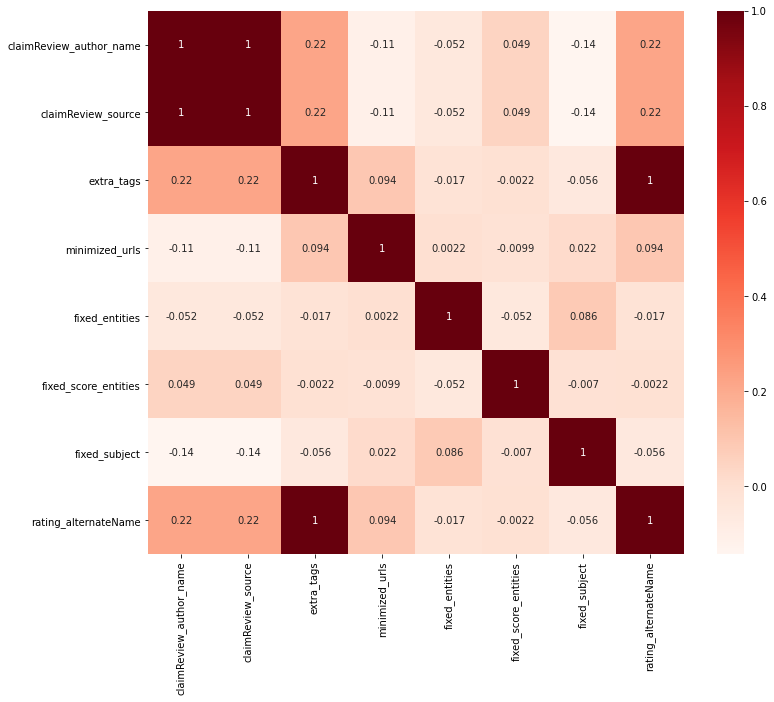

claimReview_author_name    0.219561
claimReview_source         0.219561
extra_tags                 1.000000
rating_alternateName       1.000000
Name: rating_alternateName, dtype: float64


In [43]:
class_label_encoder = LabelEncoder()
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()

df_test_label_encoder = df_downsampled.copy()
df_test_label_encoder['claimReview_Cleaned']
df_test_label_encoder['claimReview_author_name'] = class_label_encoder.fit_transform(df_test_label_encoder['claimReview_author_name'])
df_test_label_encoder['claimReview_source'] = class_label_encoder.fit_transform(df_test_label_encoder['claimReview_source'])
df_test_label_encoder['extra_tags'] = class_label_encoder.fit_transform(df_test_label_encoder['extra_tags'])
df_test_label_encoder['rating_alternateName'] = class_label_encoder.fit_transform(df_test_label_encoder['extra_tags'])
df_test_label_encoder['minimized_urls'] = class_label_encoder.fit_transform(df_test_label_encoder['minimized_urls'])
df_test_label_encoder['fixed_entities'] = class_label_encoder.fit_transform(df_test_label_encoder['fixed_entities'])
df_test_label_encoder['fixed_subject'] = class_label_encoder.fit_transform(df_test_label_encoder['fixed_subject'])
df_test_label_encoder['claimReview_Cleaned'] = vectorizer.fit_transform(df_downsampled['claimReview_Cleaned'])
df_test_label_encoder['claimReview_datePublished'] = vectorizer.fit_transform(df_downsampled['claimReview_datePublished'])

display(df_test_label_encoder['claimReview_Cleaned'])

X4 = df_test_label_encoder.drop("rating_alternateName",1)   #Feature
y4 = df_test_label_encoder["rating_alternateName"]          #Target

#Correlation de Pearson
plt.figure(figsize=(12,10))
cor = df_test_label_encoder.corr()
#cor.head()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#on retire la variable target
cor_target = abs(cor["rating_alternateName"])
#Selection des variables
relevant_features = cor_target[cor_target>0.1]
print(relevant_features)

In [44]:
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

"""mapper = DataFrameMapper([
('claimReview_author_name', LabelEncoder()),
('claimReview_datePublished', LabelEncoder()),
('claimReview_source', LabelEncoder()),
('extra_tags', LabelEncoder()),
('claimReview_Cleaned', TfidfVectorizer()),
('minimized_urls', LabelEncoder()),
('fixed_entities', LabelEncoder()),
('fixed_score_entities', None),
('fixed_subject', LabelEncoder())])"""


mapper2 = DataFrameMapper([
     ('claimReview_Cleaned', TfidfVectorizer()),
     ('claimReview_author_name', LabelEncoder()),
     ('claimReview_source', LabelEncoder()),
     ('extra_tags', LabelEncoder())
      ])

#features = mapper.fit_transform(df_downsampled)
features = mapper2.fit_transform(df_downsampled)
print(type(features))
display(features)

X_train,X_test,y_train,y_test=train_test_split(features, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

<class 'numpy.ndarray'>


array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        1.103e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        4.460e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        5.850e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        9.380e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        1.250e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        1.800e+02]])

In [45]:
def printreport(exp, pred):
    print(pd.crosstab(exp, pred, rownames=['Actual'], colnames=['Predicted']))
 
    print('\n \n')
    print(classification_report(exp, pred))

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
 
printreport(y_test, predicted)

Predicted     0     1
Actual               
0          2460   761
1          1520  1284

 

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      3221
           1       0.63      0.46      0.53      2804

    accuracy                           0.62      6025
   macro avg       0.62      0.61      0.61      6025
weighted avg       0.62      0.62      0.61      6025



In [46]:
seed=7

k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression(max_iter=3000)

scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, y, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))

print('Les différentes accuracy pour les 10 évaluations sont : \n',
      score,'\n')
print ('Accuracy moyenne : ',score.mean(), 
       ' standard deviation', score.std())


Réalisé en 216.626s
Les différentes accuracy pour les 10 évaluations sont : 
 [0.73170732 0.70615563 0.69337979 0.71544715 0.68989547 0.68757259
 0.71395349 0.73604651 0.69069767 0.69767442] 

Accuracy moyenne :  0.7062530048888529  standard deviation 0.01666499711195075


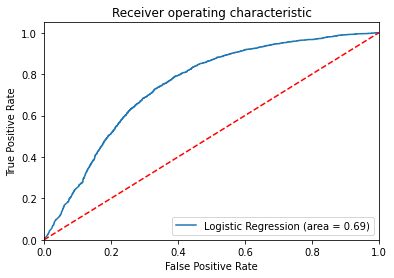

In [47]:
clf.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Un bon classifieur reste le plus loin possible de la courbe ROC. Ce dernier représente un classifieur aléatoire.

In [54]:
models = []
models.append(('LSVC', LinearSVC(max_iter=3000, dual = False)))
models.append(('SGD', SGDClassifier()))
models.append(('LR', LogisticRegression(max_iter=3000)))
#models.append(('RFC', RandomForestClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVC', SVC(gamma='auto')))
#models.append(('XGB', XGBClassifier()))
models.append(('MNB', MultinomialNB()))

In [55]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    start_time = time()
    cv_results = cross_val_score(model, features, y, cv=kfold, scoring=scoring)
    print (model.get_params())
    print ("Time pour",name," ",time() - start_time)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 3000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
Time pour LSVC   3.915306806564331
LSVC: 0.565765 (0.158388)
{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Time pour SGD   115.73175144195557
SGD: 0.469526 (0.425219)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'ver

[Text(0, 0, 'LSVC'),
 Text(0, 0, 'SGD'),
 Text(0, 0, 'LR'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'MNB')]

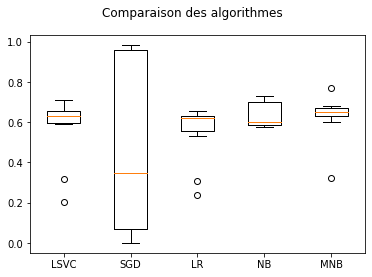

In [56]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

On fait une séléction sur le top 3 des algorithmes pour pouvoir optimiser leur paramètres


In [59]:
classifiers = {
     'LinearSVC':  LinearSVC(max_iter=3000, dual = False),
    'LogisticRegression': LogisticRegression(max_iter=3000),
    'SGD': SGDClassifier()
}

parameters_SGDC = [
    {'max_iter': (5,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet')}
]


LR_classifier = {
    'LogisticRegression': LogisticRegression(max_iter=3000)
}

params = {'LinearSVC': [{'C': [0.001,0.01,0.1, 1, 10, 100, 1000]}],
          'LogisticRegression' : [{'C': [0.001,0.01,0.1,1,10,100,1000] }],
          'SGD' : parameters_SGDC
        }


"""rand_classifiers = {
    'XGB': XGBClassifier()
}

params = {]

rand_params = {'XGB' : [{'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }]}"""

"rand_classifiers = {\n    'XGB': XGBClassifier()\n}\n\nparams = {]\n\nrand_params = {'XGB' : [{'n_estimators': stats.randint(150, 1000),\n              'learning_rate': stats.uniform(0.01, 0.6),\n              'subsample': stats.uniform(0.3, 0.9),\n              'max_depth': [3, 4, 5, 6, 7, 8, 9],\n              'colsample_bytree': stats.uniform(0.5, 0.9),\n              'min_child_weight': [1, 2, 3, 4]\n             }]}"

In [60]:
class Result:
     def __init__(self,name, score, parameters):
         self.name = name
         self.score = score
         self.parameters = parameters
     def __repr__(self):
         return repr((self.name, self.score, self.parameters))
        
def make_grid_search(classifiers, params):
    results = []
    for key,value in classifiers.items():
        gd_sr = GridSearchCV(estimator=value,  
                         param_grid=params[key],
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1,
                         iid=True, verbose = 41)
        #Verbose pour avoir des messages sur le déroulement
        gd_sr.fit(X_train, y_train)  
        RES=Result(key,gd_sr.best_score_,gd_sr.best_estimator_)
        results.append(RES)   
    return results

#Approche aléatoire de la recherche des meilleurs hyperparamètres
def make_random_search(classifiers, params, n_iter):
    results = []
    for key,value in classifiers.items():
        rand_sr = RandomizedSearchCV(estimator=value, 
                                     param_distributions = params[key], 
                                     random_state=1, 
                                     n_iter=n_iter, 
                                     cv=3, 
                                     n_jobs=-1,
                                     scoring='accuracy',
                                     iid=True,
                                     return_train_score=True, verbose=41)
        rand_sr.fit(X_train, y_train)
        RES=Result(key,rand_sr.best_score_,rand_sr.best_estimator_)
        results.append(RES)
    return results
        
results = make_grid_search(classifiers, params)
#results = make_random_search(rand_classifiers, rand_params, 20)

results=sorted(results, key=lambda RES: RES.score, reverse=True) 

print ('Le meilleur resultat : \n')
print ('Classifier : ',results[0].name, 
       ' score %0.2f' %results[0].score, 
       ' avec ',results[0].parameters,'\n')

print ('Tous les résultats : \n')
for result in results:
    print ('Classifier : ',result.name, 
           ' score %0.2f' %result.score, 
           ' avec ',result.parameters,'\n')




Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  13 out of  35 | elapsed:    1.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  14 out of  35 | elapsed:    1.5s remaining:    2.2s
[Parallel(n_jobs=

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  13 out of  35 | elapsed:   11.8s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  14 out of  35 | elapsed:   12.1s remaining:   18.1s
[Parallel(n_jobs=

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0774s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elap

ValueError: Invalid parameter clf for estimator SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

Comparaison après recherche des meilleurs paramètres:

TypeError: cannot perform reduce with flexible type

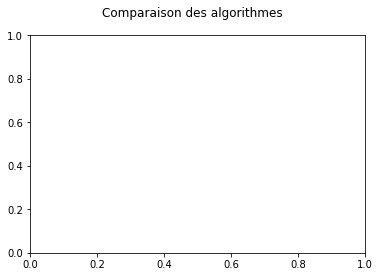

In [53]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
scores = []
names = []
for result in results:
    scores.append(result.score)
    scores.append(result.name)
plt.boxplot(scores)
ax.set_xticklabels(names)

In [ ]:
"""pipeline_MNB = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

X=mydf.sample(nbsample)
display(X)
y = df_downsampled['rating_alternateName'].sample(nbsample)
y=y.astype('int')
display(y)



X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

t0 = time()
pipeline_MNB.fit(X_train, y_train)
print("Fit réalisé en %0.3fs" % (time() - t0))

t0 = time()
result = pipeline_MNB.predict(X_test)
print("Prédiction réalisée en %0.3fs" % (time() - t0))

print('\n accuracy:',accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)


print ('\n',classification_report(y_test, result))"""

In [ ]:

"""pipeline = Pipeline([('vect', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='hinge', 
                                      penalty='l2',
                                      alpha=1e-3, 
                                      random_state=42, 
                                      max_iter=5, tol=None)),
               ])

array = df2.values[0:1000]

#print("Y :")
y= array[:,7]
#y=y.astype('int')
#display(y)

#print("X :")
X = array
nbLignesX, nbColonnesX = X.shape
#print(nbLignesX)

indexY = [7]
idx = 0
new_X = []
while idx < nbLignesX:
    new_X_i = np.delete(X[idx], indexY)
    new_X.append(new_X_i)
    idx+=1

#X=mydf.sample(8000)
#y=df_downsampled['rating_alternateName'].sample(8000)
#y=y.astype('int')
#np.unique(x)
display(X)
    

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


t0 = time()
pipeline.fit(X_train, y_train)
print("Fit réalisé en %0.3fs" % (time() - t0))

t0 = time()
result = pipeline.predict(X_test)
print("Prédiction réalisée en %0.3fs" % (time() - t0))

print('\n accuracy:',accuracy_score(result, y_test),'\n')


conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)

print ('\n',classification_report(y_test, result))"""

In [ ]:
# Specification des pipelines
# programmation à optimiser par une fonction :)
"""pipeline_SGDC = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', SGDClassifier())])


parameters_SGDC = [
    {'clf__max_iter': (5,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet')}
]

pipeline_DT = Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', DecisionTreeClassifier())])


#param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range = [1, 5, 8, 10]
parameters_DT = [
    {'clf__min_samples_leaf': param_range,
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}
]


parameters_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
pipeline_LR = Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', LogisticRegression())])

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


nb.fit(X_train, y_train)

# Creation des GridSearchCV avec les pipelines spécifiques

gs_SGDC = GridSearchCV(pipeline_SGDC, 
                       parameters_SGDC, 
                       cv=3,
                       n_jobs=-1, 
                       scoring='accuracy')

gs_DT = GridSearchCV(pipeline_DT, 
                     parameters_DT, 
                     cv=3,
                     n_jobs=-1, 
                     scoring='accuracy')

gs_DT = GridSearchCV(pipeline_LR, 
                     parameters_LR, 
                     cv=3,
                     n_jobs=-1, 
                     scoring='accuracy')




grids = [gs_SGDC, gs_DT, gd_sr]
#grids = [gs_SGDC, gs_DT]
grid_dict={0:'Linear classifiers', 1:'Decision Tree', 2:'Logistic Regression'}
#grid_dict={0:'Linear classifiers', 1:'Decision Tree'}

best_acc = 0.0
best_clf = 0.0
best_gs = ''

for idx,gs in enumerate(grids):
    print('\nClassifier: %s' % grid_dict[idx])
    t0 = time()
    gs.fit(X_train, y_train)
    print("Fit réalisé en %0.3fs" % (time() - t0))

    print('Meilleurs paramètres : %s' % gs.best_params_)

    print("Meilleur score d'accuracy sur l'entrainement: %.3f" % gs.best_score_)
    # Prediction sur le jeu de test avec les meilleurs paramètres
    t0 = time()
    result = gs.predict(X_test)
    print("Prédiction réalisée en %0.3fs" % (time() - t0))
    
    print("Score d'accuracy pour les meilleurs paramètres sur jeu de test : %.3f"  % accuracy_score(y_test, result))

    print ('\n matrice de confusion \n',confusion_matrix(y_test, result))

    print ('\n',classification_report(y_test, result))
    
    #Modele avec la meilleure accuracy sur le jeu de test
    if accuracy_score(y_test, result) > best_acc:
        best_acc = accuracy_score(y_test, result)
        best_gs = gs
        best_clf = idx
        
        
        
print('\nClassifier avec la meilleur accuracy sur le jeu de test\n',
      grid_dict[best_clf])    """    

Sauvegarde de notre meilleur modèle :

In [ ]:
"""pipeline = Pipeline([('vect', TfidfVectorizer(preprocessor=clean_text)),
                ('clf', SGDClassifier(loss='hinge', 
                                      penalty='l2',
                                      alpha=1e-05, 
                                      random_state=42, 
                                      max_iter=5, 
                                      tol=None)),
               ])


X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


t0 = time()
print ("Lancement du fit \n")
pipeline.fit(X_train, y_train)
print("Fit réalisé en %0.3fs" % (time() - t0))

t0 = time()
print ("Lancement de la prédiction \n")
result = pipeline.predict(X_test)
print("Prédiction réalisée en %0.3fs" % (time() - t0))

print('\n accuracy:',accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)



print ('\n',classification_report(y_test, result))

print("\nSauvegarde du pipeline grid search") 
filename = 'thebestone.pkl'
pickle.dump(pipeline, open(filename, 'wb'))"""